# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from collections import Counter

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


---

# Reading data

In [2]:
df = pd.read_csv("/kaggle/input/customer-segmentation/Customer_Data (1).csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

---

# Data Visulaization

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


### Check for null values

In [6]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

### Data distribution

array([[<AxesSubplot: title={'center': 'BALANCE'}>,
        <AxesSubplot: title={'center': 'BALANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'PURCHASES'}>,
        <AxesSubplot: title={'center': 'ONEOFF_PURCHASES'}>],
       [<AxesSubplot: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE'}>,
        <AxesSubplot: title={'center': 'PURCHASES_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_TRX'}>,
        <AxesSubplot: title={'center': 'PURCHASES_TRX'}>],
       [<AxesSubplot: title={'center': 'CREDIT_LIMIT'}>,
        <AxesSubplot: title={'center': 'PAYMENTS'}>,
        <AxesSubplot: title={'center': 'MINIMUM_PAYMENTS'}>,
        <AxesSubplot: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes

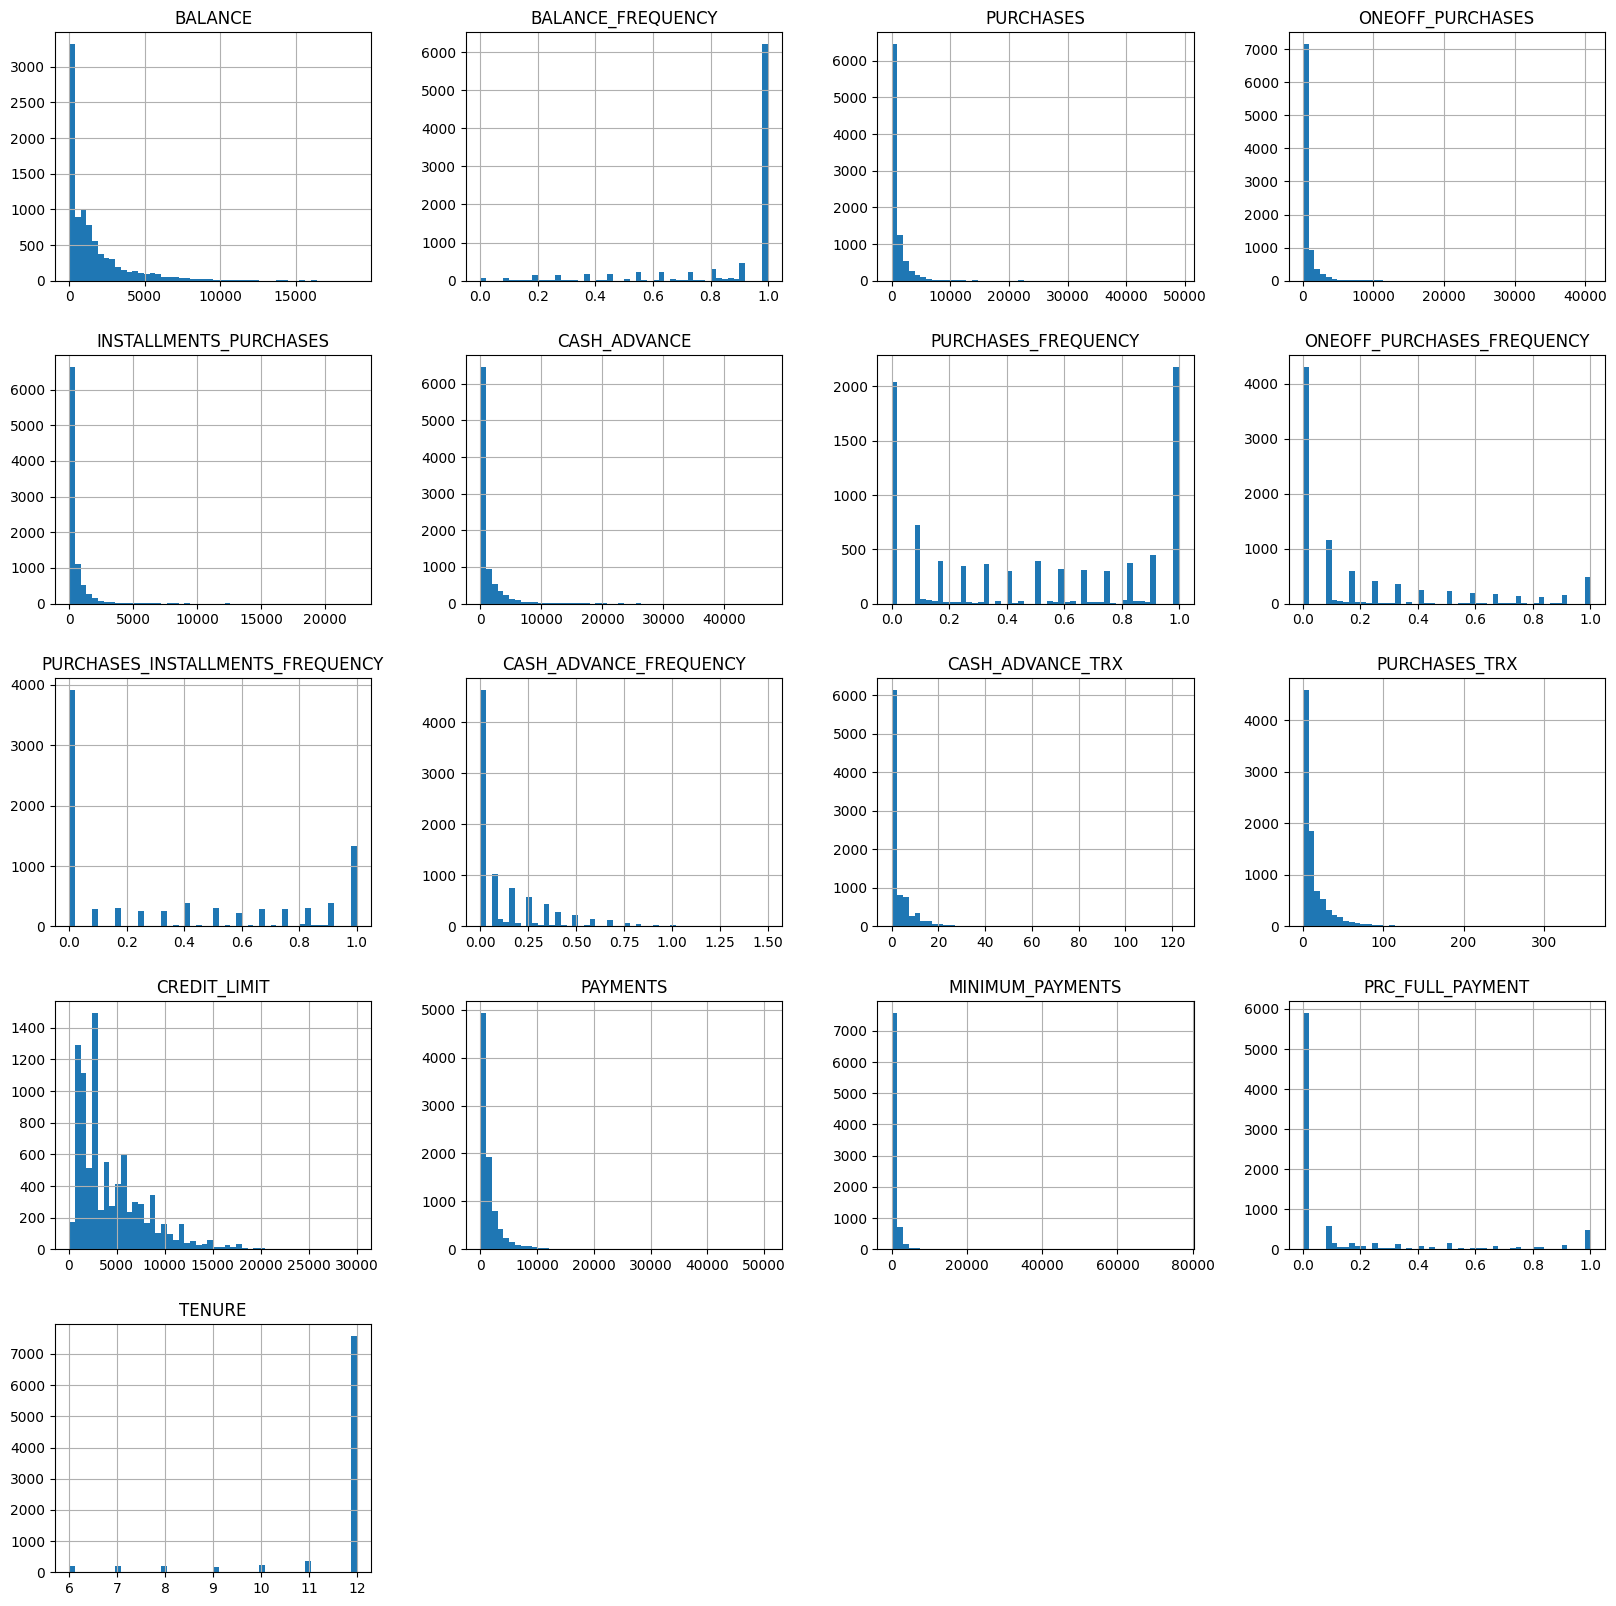

In [7]:
df.hist(figsize=(20,20), bins=50)

In [8]:
col = list(df.columns)
print(col)
col.pop(0)

['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


'CUST_ID'

# Check for outliers

--------------------------------------------------
column name = BALANCE


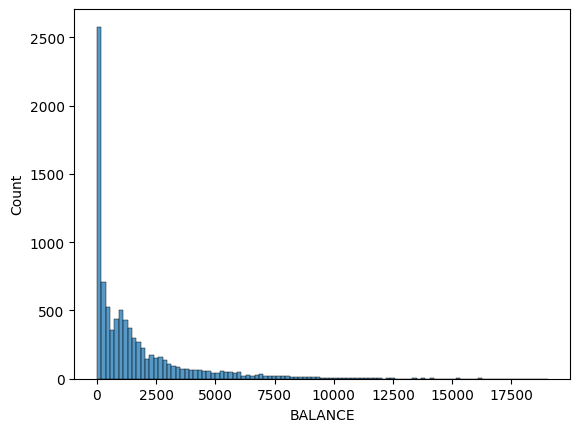

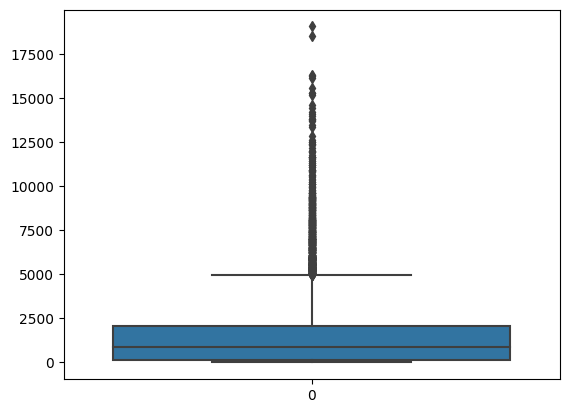

--------------------------------------------------
column name = BALANCE_FREQUENCY


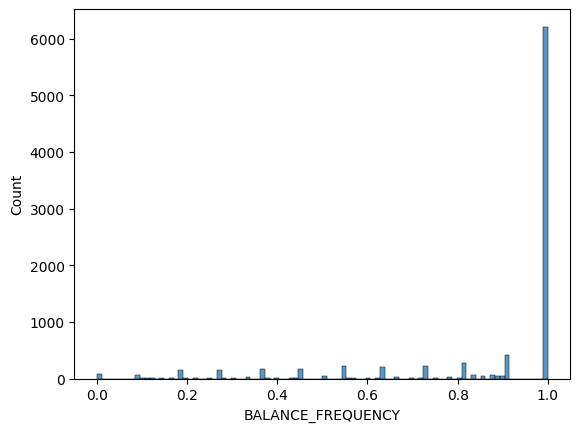

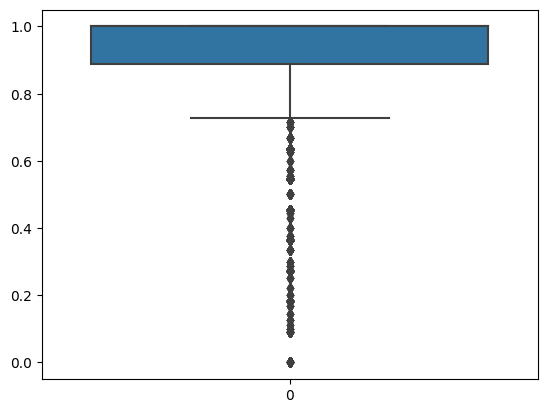

--------------------------------------------------
column name = PURCHASES


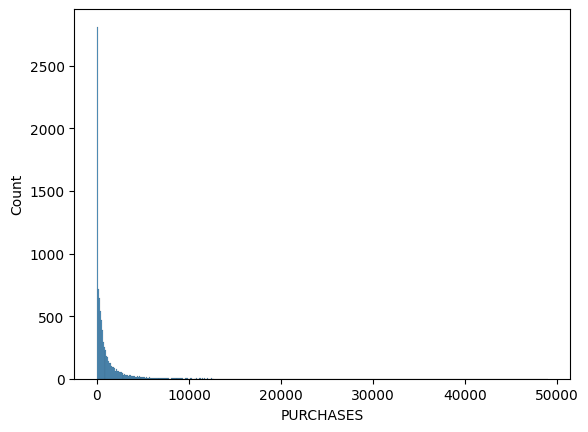

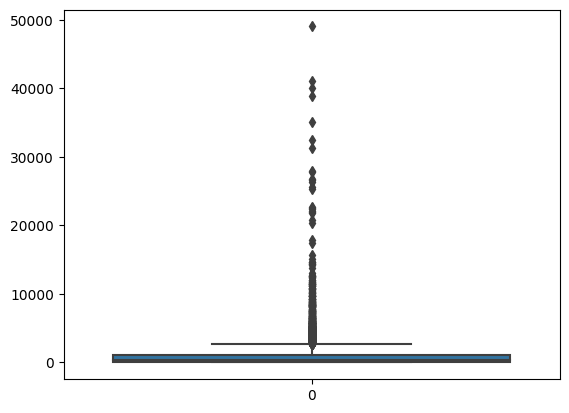

--------------------------------------------------
column name = ONEOFF_PURCHASES


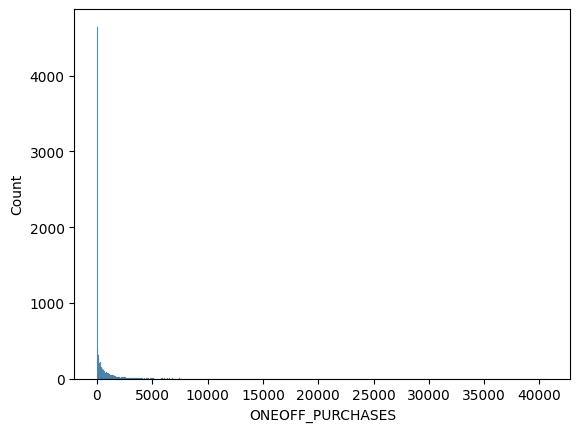

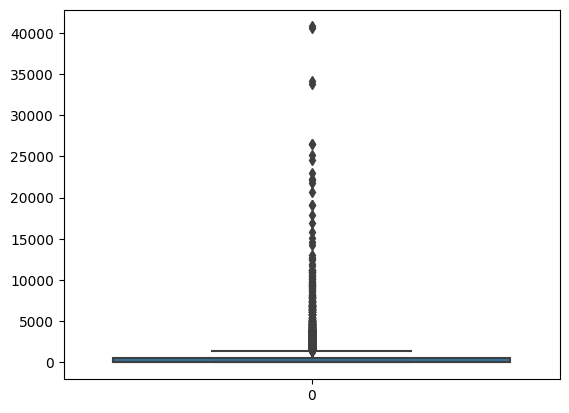

--------------------------------------------------
column name = INSTALLMENTS_PURCHASES


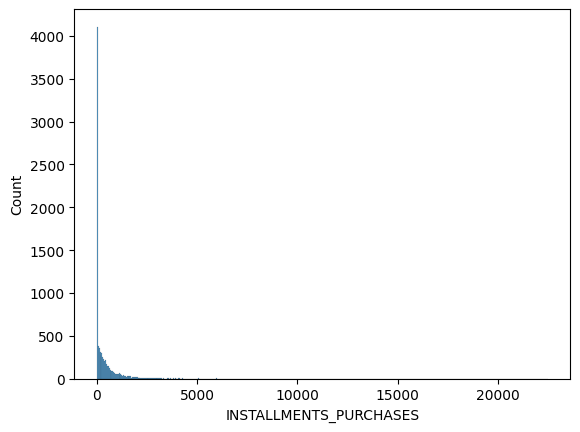

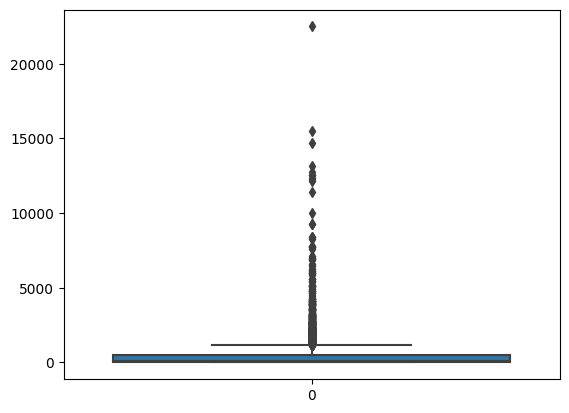

--------------------------------------------------
column name = CASH_ADVANCE


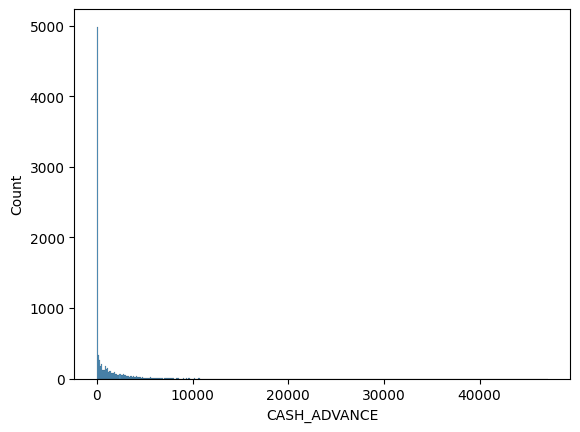

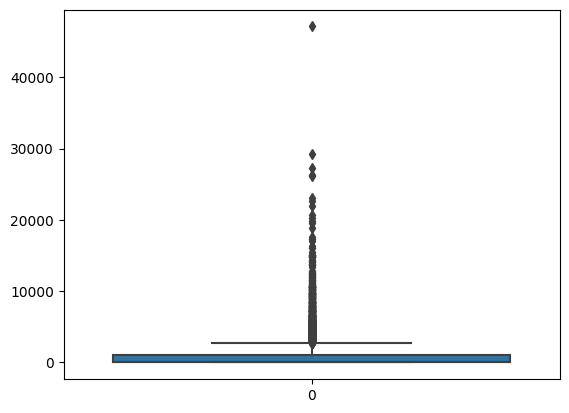

--------------------------------------------------
column name = PURCHASES_FREQUENCY


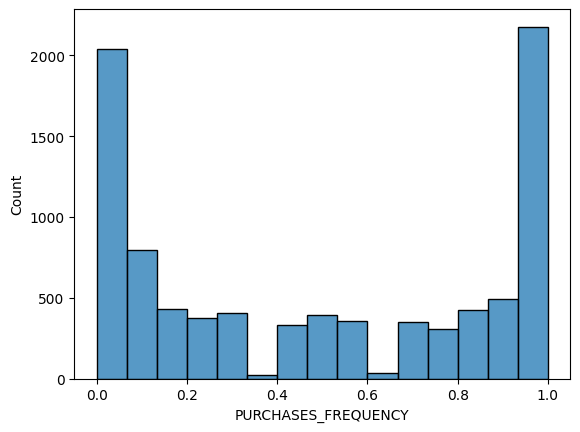

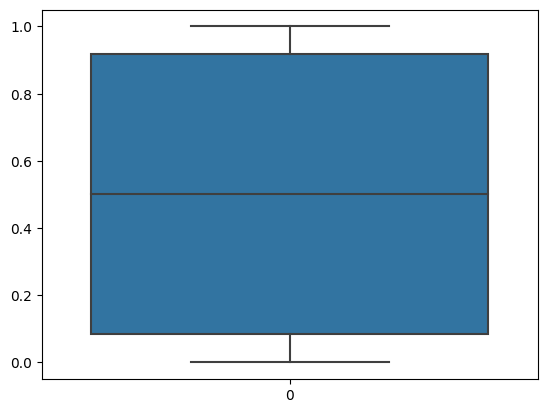

--------------------------------------------------
column name = ONEOFF_PURCHASES_FREQUENCY


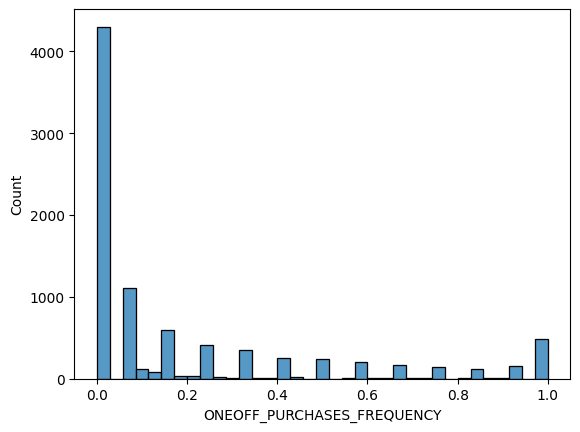

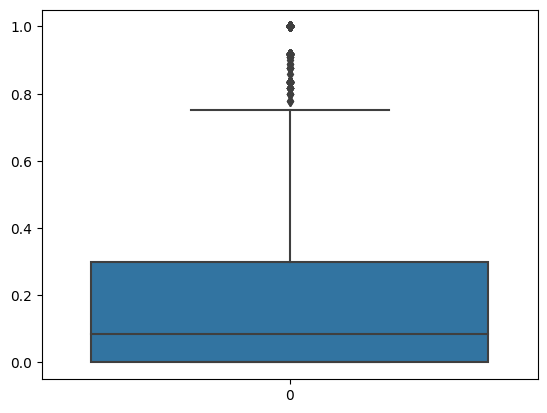

--------------------------------------------------
column name = PURCHASES_INSTALLMENTS_FREQUENCY


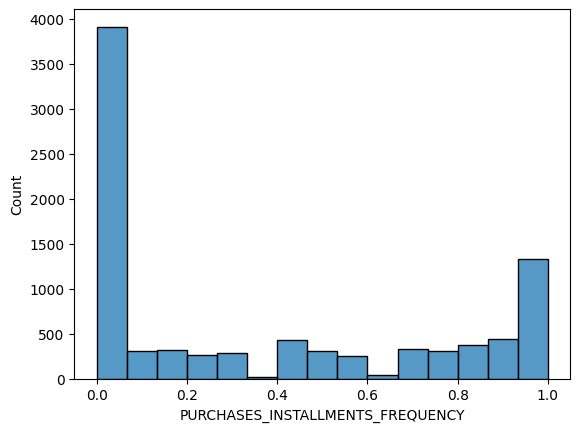

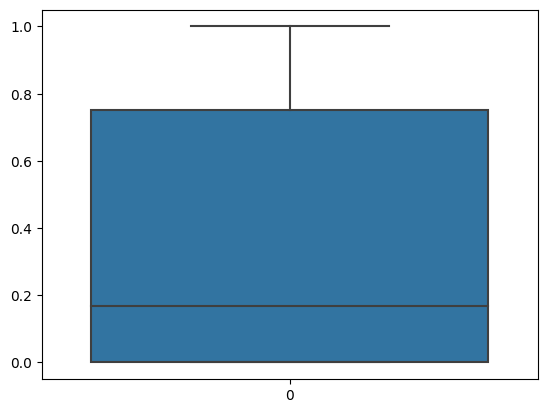

--------------------------------------------------
column name = CASH_ADVANCE_FREQUENCY


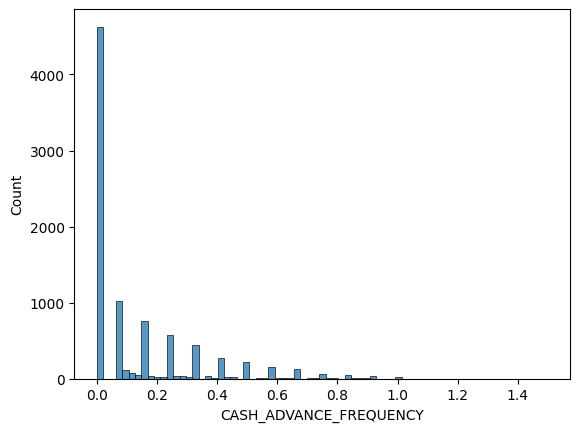

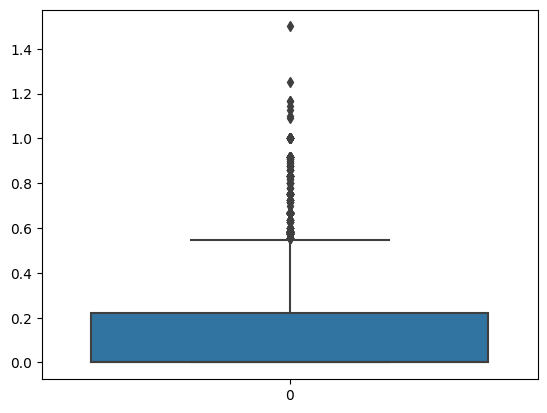

--------------------------------------------------
column name = CASH_ADVANCE_TRX


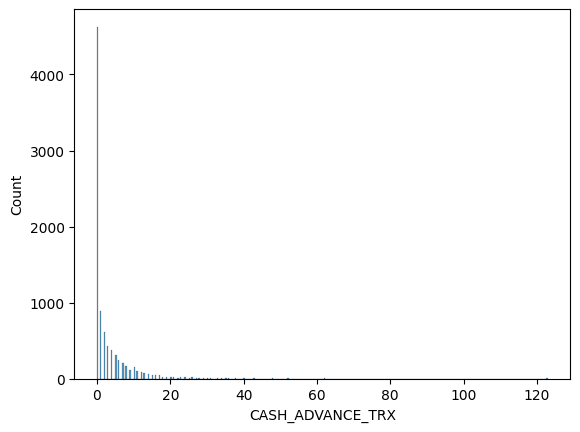

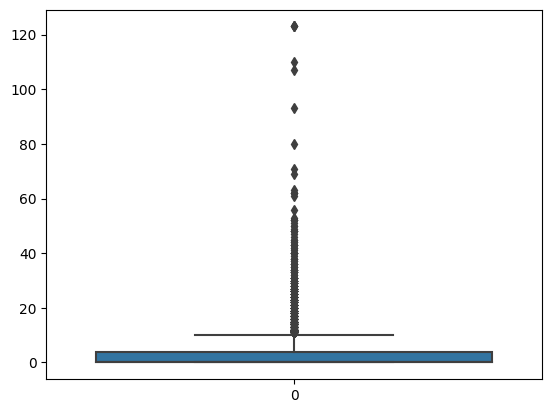

--------------------------------------------------
column name = PURCHASES_TRX


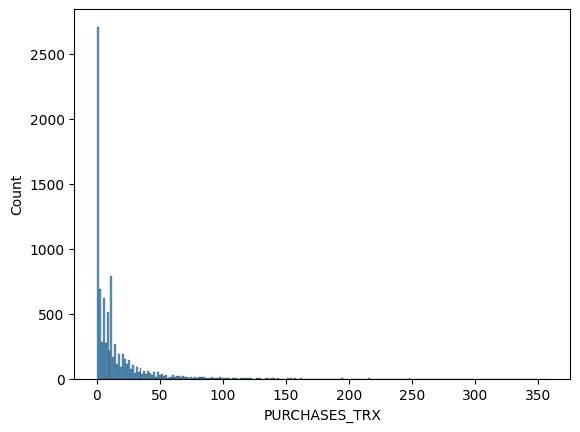

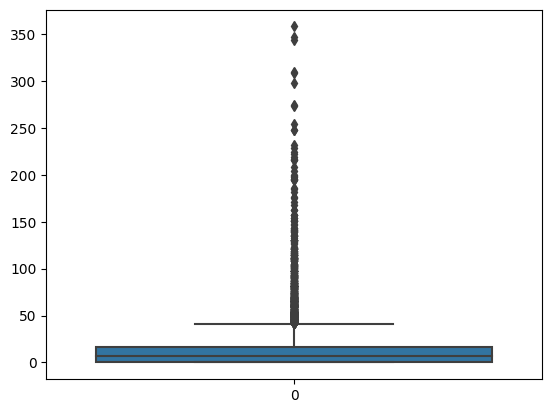

--------------------------------------------------
column name = CREDIT_LIMIT


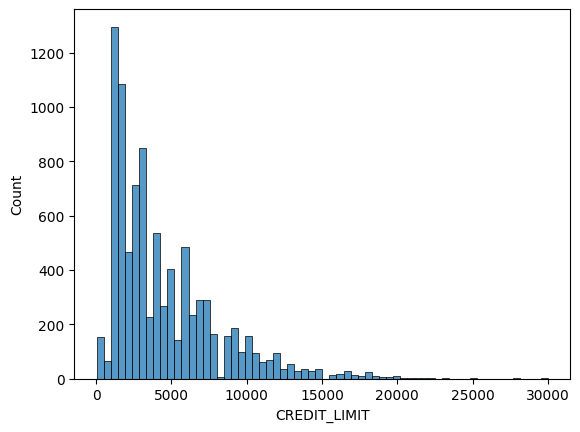

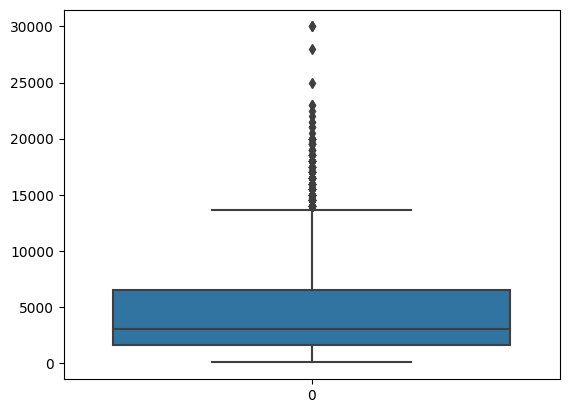

--------------------------------------------------
column name = PAYMENTS


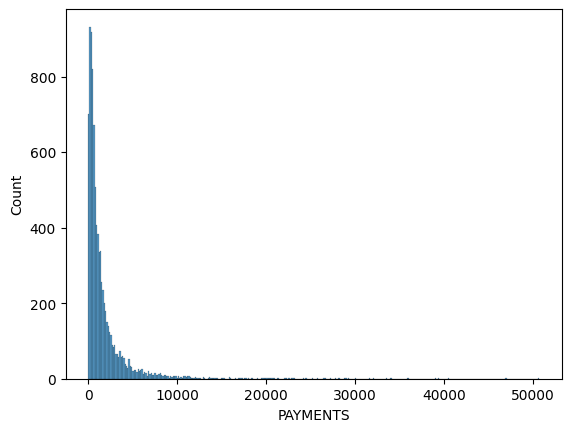

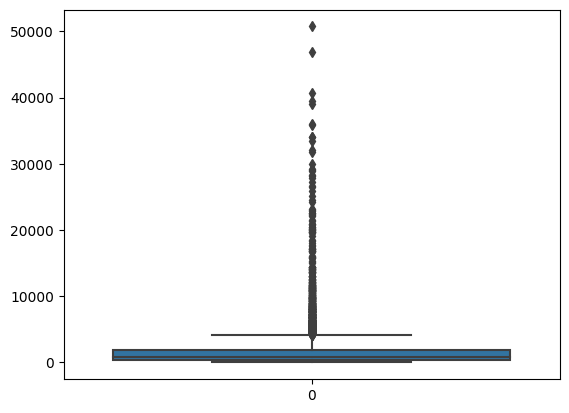

--------------------------------------------------
column name = MINIMUM_PAYMENTS


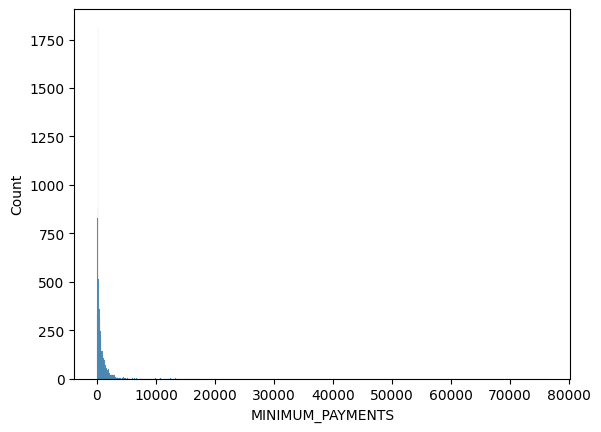

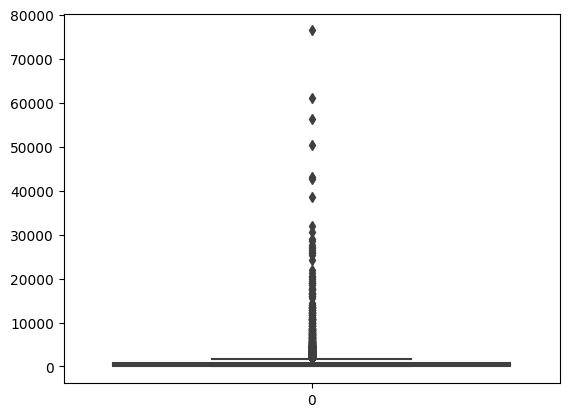

--------------------------------------------------
column name = PRC_FULL_PAYMENT


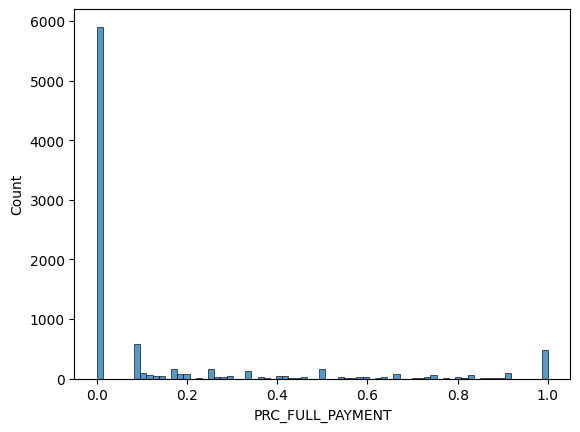

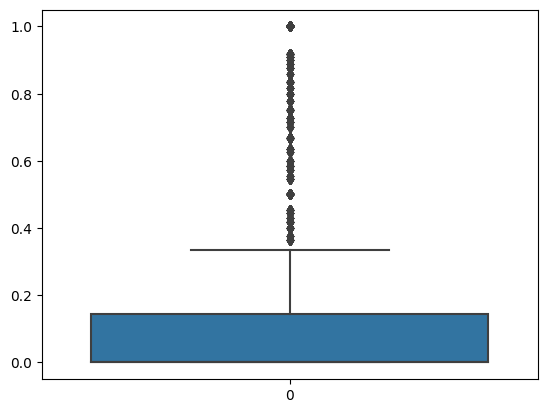

--------------------------------------------------
column name = TENURE


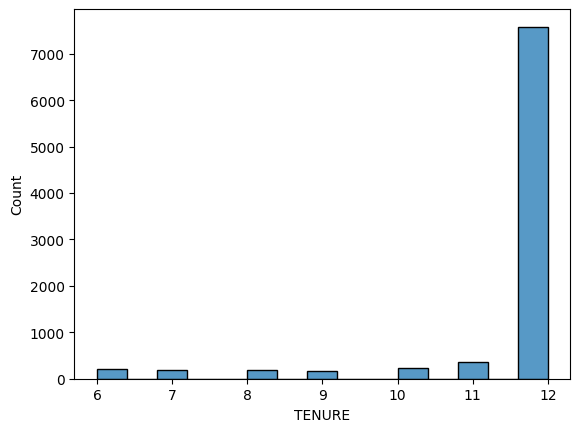

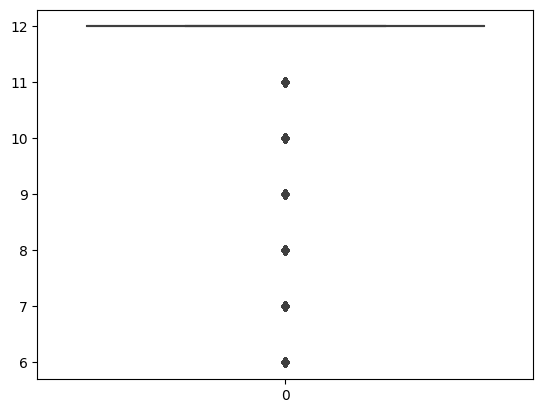

In [9]:
for i in col:
    print("-" * 50)
    print(f"column name = {i}")
    sns.histplot(df[i])
    plt.show()
    sns.boxplot(df[i])
    plt.show()

### Correlation between features

/tmp/ipykernel_34/1303356989.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


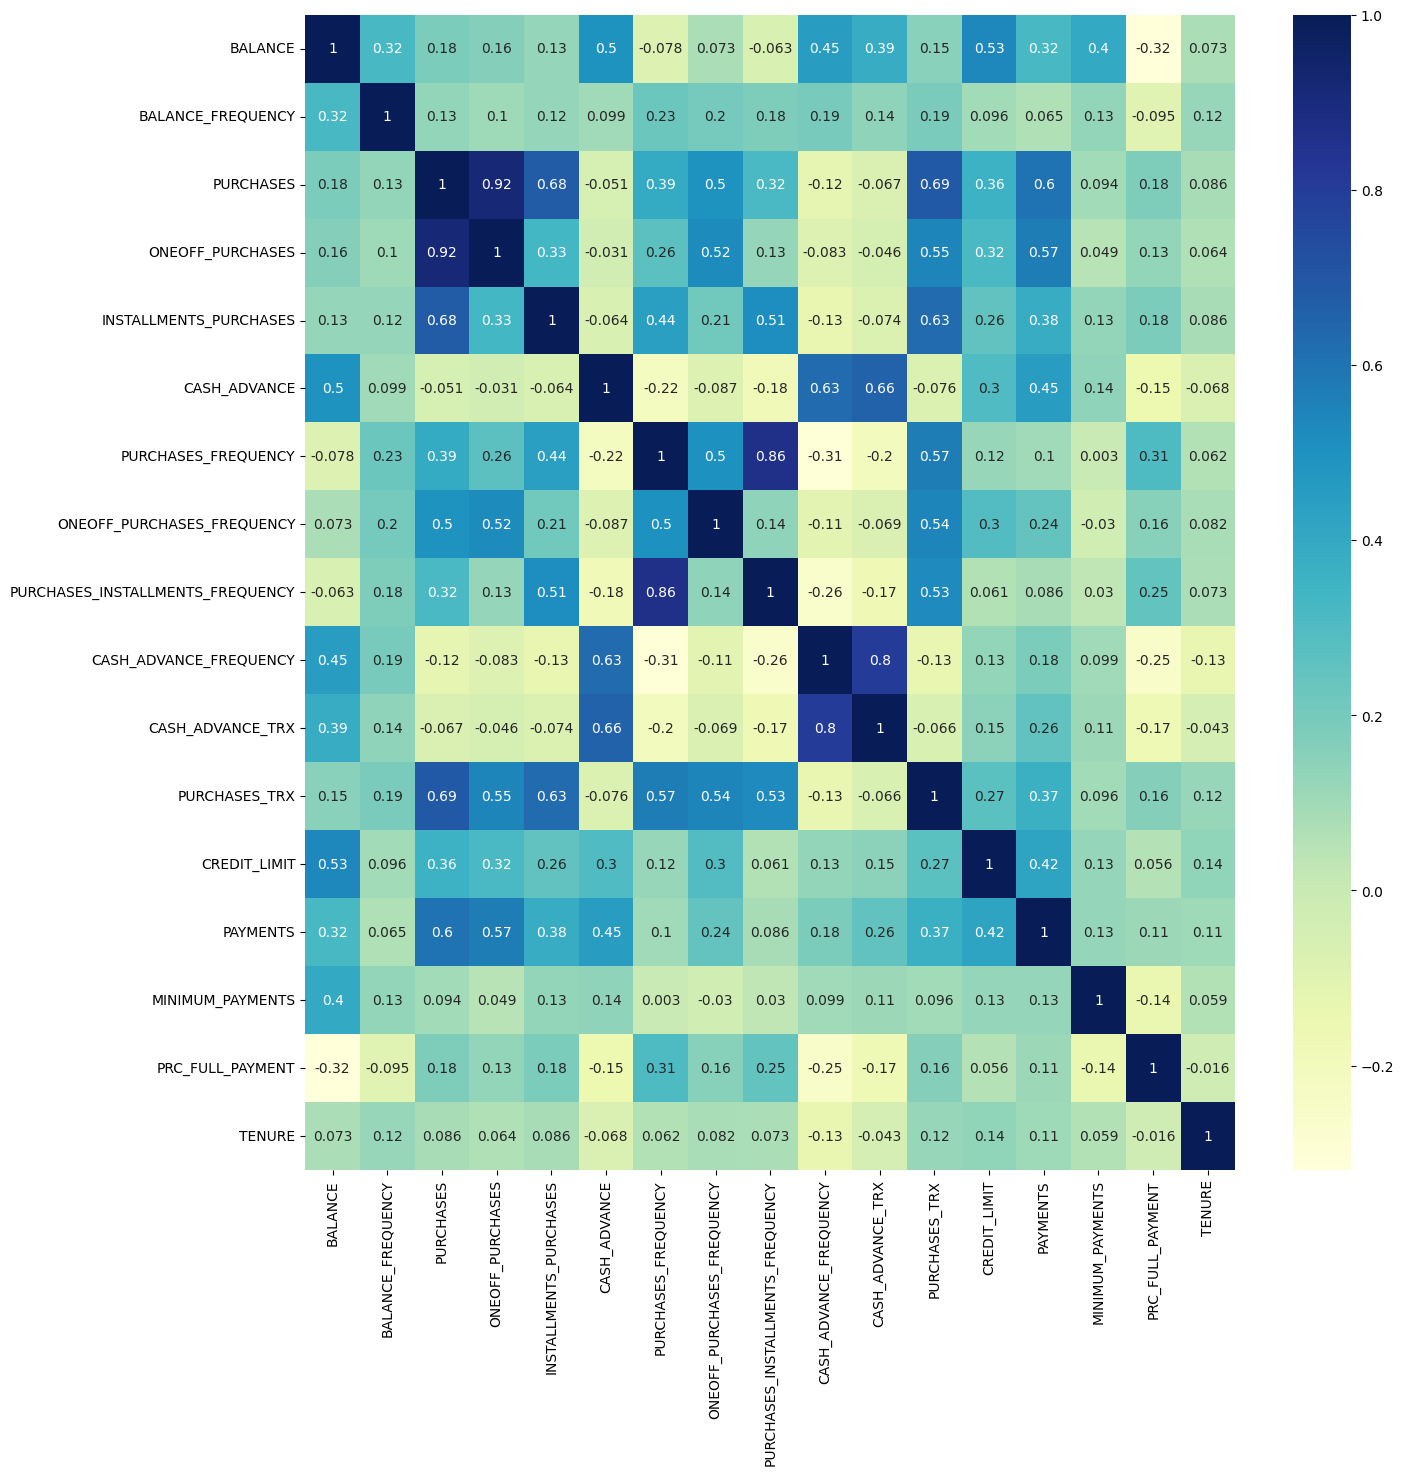

In [10]:
plt.figure(figsize=(15,15))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

### There is a high correlation between ONEOFF_PURCHASES and PURCHASES

<AxesSubplot: xlabel='PURCHASES', ylabel='ONEOFF_PURCHASES'>

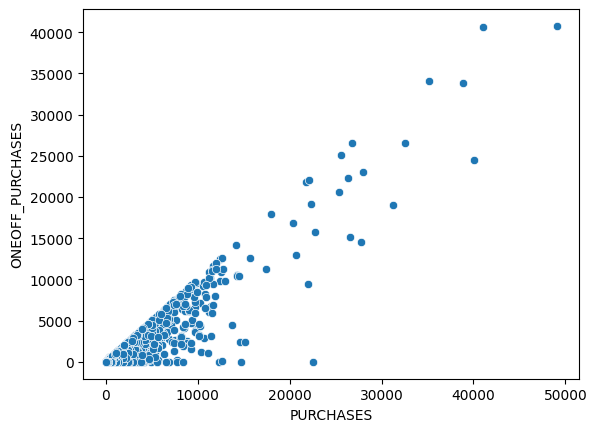

In [11]:
sns.scatterplot(data=df, x="PURCHASES", y= "ONEOFF_PURCHASES")

---

# preprocessing the data

In [12]:
df.drop('CUST_ID', inplace=True, axis=1)

In [13]:
colnames = df.columns

### Create pipeline

In [14]:
full_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")),
                          ("power transformation", PowerTransformer())]) ### appling power transformation because of outliers

### Transforming the data

In [15]:
data_prepared = full_pipeline.fit_transform(df)

In [16]:
new_df = pd.DataFrame(data_prepared, columns = colnames)

In [17]:
new_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.238103,-1.079348,-0.368050,-1.000488,0.383704,-0.944538,-0.766859,-0.903315,-0.606642,-0.883204,-0.905801,-0.573664,-1.425353,-0.983876,-0.824388,-0.677889,0.422252
1,1.051961,-0.424939,-1.505149,-1.000488,-1.085422,1.399909,-1.278866,-0.903315,-1.004445,1.124423,1.044342,-1.387624,0.924217,1.285321,0.917393,1.235021,0.422252
2,0.860616,0.628612,0.521657,1.065381,-1.085422,-0.944538,1.218860,1.732554,-1.004445,-0.883204,-0.905801,0.494757,1.012194,-0.291722,0.475906,-0.677889,0.422252
3,0.570542,-1.710851,0.875823,1.229556,-1.085422,0.680451,-1.015926,-0.092230,-1.004445,0.136071,0.194580,-0.872718,1.012194,-2.782085,-0.115812,-0.677889,0.422252
4,0.111925,0.628612,-0.904786,-0.019902,-1.085422,-0.944538,-1.015926,-0.092230,-1.004445,-0.883204,-0.905801,-0.872718,-1.215705,-0.231669,-0.327305,-0.677889,0.422252


array([[<AxesSubplot: title={'center': 'BALANCE'}>,
        <AxesSubplot: title={'center': 'BALANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'PURCHASES'}>,
        <AxesSubplot: title={'center': 'ONEOFF_PURCHASES'}>],
       [<AxesSubplot: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE'}>,
        <AxesSubplot: title={'center': 'PURCHASES_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_TRX'}>,
        <AxesSubplot: title={'center': 'PURCHASES_TRX'}>],
       [<AxesSubplot: title={'center': 'CREDIT_LIMIT'}>,
        <AxesSubplot: title={'center': 'PAYMENTS'}>,
        <AxesSubplot: title={'center': 'MINIMUM_PAYMENTS'}>,
        <AxesSubplot: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes

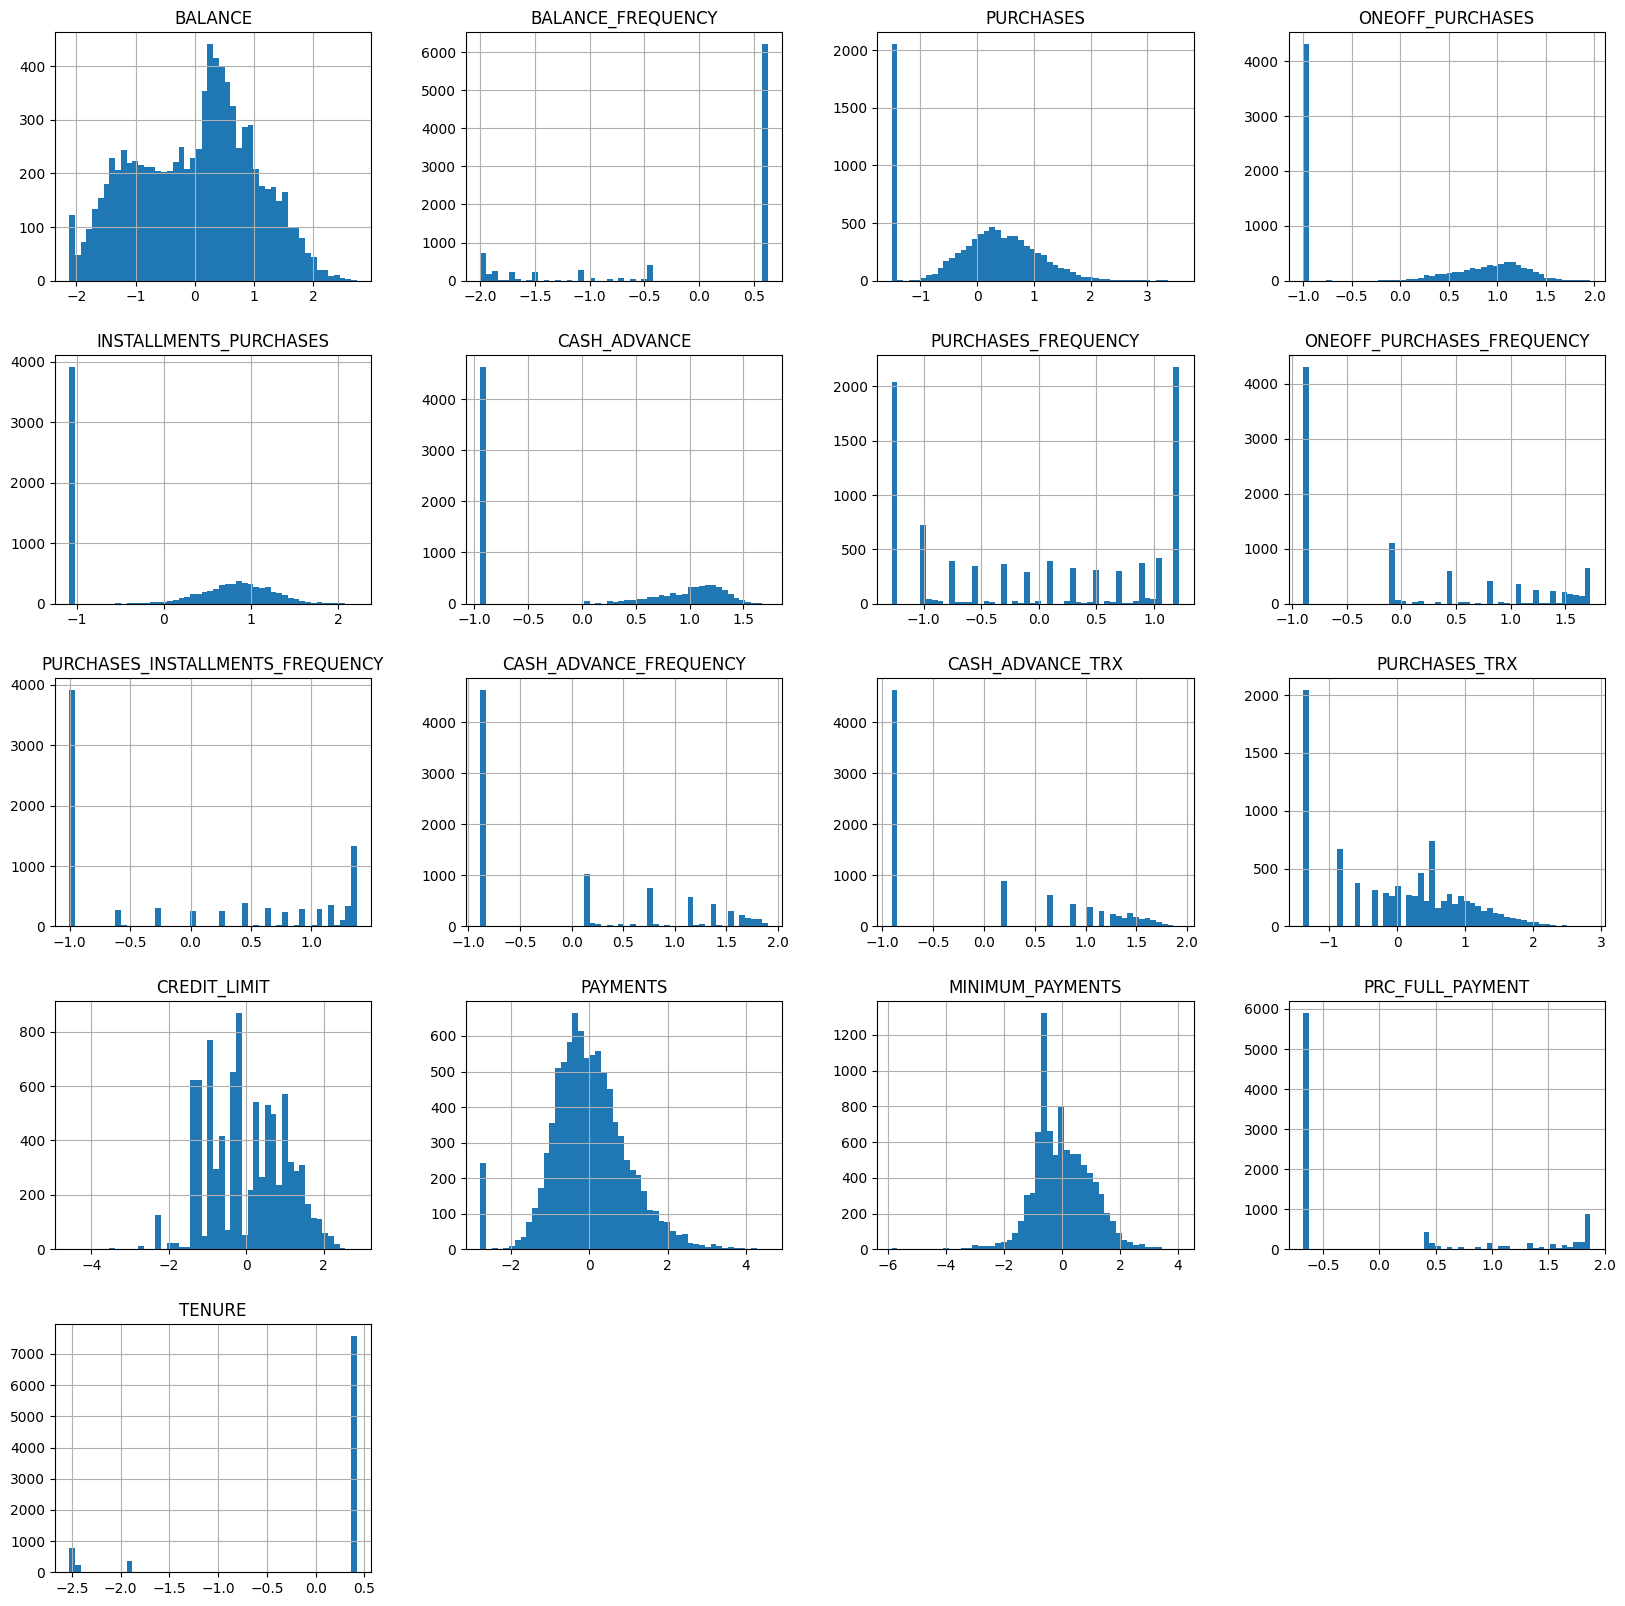

In [18]:
new_df.hist(figsize=(20,20), bins=50)

In [19]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,-4.445854e-17,1.000056,-2.120305,-0.816807,0.151681,0.717913,2.731227
BALANCE_FREQUENCY,8950.0,-4.699903e-16,1.000056,-1.997716,-0.598992,0.628612,0.628612,0.628612
PURCHASES,8950.0,1.238488e-16,1.000056,-1.505149,-0.654799,0.160770,0.710251,3.559070
ONEOFF_PURCHASES,8950.0,6.986342e-17,1.000056,-1.000488,-1.000488,0.237516,0.990945,1.959134
INSTALLMENTS_PURCHASES,8950.0,7.343598e-17,1.000056,-1.085422,-1.085422,0.361196,0.906100,2.212015
CASH_ADVANCE,8950.0,1.381390e-16,1.000056,-0.944538,-0.944538,-0.944538,1.059052,1.729923
PURCHASES_FREQUENCY,8950.0,6.668781e-17,1.000056,-1.278866,-1.015926,0.119657,1.050283,1.218860
ONEOFF_PURCHASES_FREQUENCY,8950.0,-2.540488e-17,1.000056,-0.903315,-0.903315,-0.092230,0.978077,1.732554
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,-7.462683e-17,1.000056,-1.004445,-1.004445,-0.273845,1.069884,1.377136
CASH_ADVANCE_FREQUENCY,8950.0,-9.804696e-17,1.000056,-0.883204,-0.883204,-0.883204,1.016910,1.902718


---

# PCA

In [20]:
new_df.shape

(8950, 17)

In [21]:
k_hist = []
var_hist = [] 

for i in range(1,18):
    pca = PCA(n_components=i)
    pca.fit(new_df)
    k_hist.append(i)
    var_hist.append(np.sum(pca.explained_variance_ratio_))

### 95% of the variance is explained with 8 principle components only

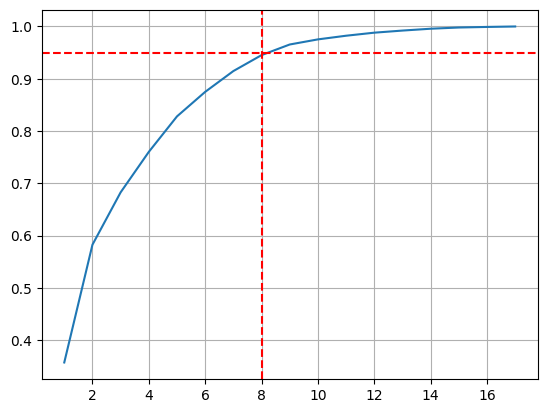

In [22]:
graph = sns.lineplot(x= k_hist, y = var_hist)
graph.axhline(.95,linestyle="--", color='red')
graph.axvline(8,linestyle="--", color='red')
plt.grid()
plt.show()

---

# Helping functions

## Compare different silhouette_score with different number of clusters and different clustering technique after and before PCA

In [23]:
def SC_elbow_method_beforePCA(data, k):
    k_history = []
    kmeans_loss_history = []
    hc_loss_history = []
    gmm_loss_history = []
    
    for i in range(2,k+1,1):
        kmeans = KMeans(n_clusters=i, random_state=42,n_init="auto").fit(data)
        kmeans_labels = kmeans.labels_
        kmeans_loss_history.append(silhouette_score(data, kmeans_labels))
        
        hc = AgglomerativeClustering(n_clusters=i).fit(data)
        hc_labels = hc.labels_
        hc_loss_history.append(silhouette_score(data, hc_labels))
        
        gmm = GaussianMixture(n_components=i, random_state=42).fit(data)
        gmm_labels = gmm.predict(data)
        gmm_loss_history.append(silhouette_score(data, gmm_labels))
        
        k_history.append(i)

    plt.figure(figsize=(20,7))
    
    plt.plot(k_history, kmeans_loss_history, 'g*-', label = "Kmeans")
    plt.plot(k_history, hc_loss_history, 'b*-' , label = "Hierarchical Clustering")
    plt.plot(k_history, gmm_loss_history, 'r*-', label = "GMM")
    
    plt.title('number of clusters vs. silhouette score')
    plt.xlabel('number of clusters')
    plt.ylabel('silhouette score')
    plt.legend()
    plt.grid()

In [24]:
def SC_elbow_method_afterPCA(data, k, n_pca):
    k_history = []
    kmeans_loss_history = []
    hc_loss_history = []
    gmm_loss_history = []

    pca = PCA(n_components=n_pca)
    new_data = pca.fit_transform(data)
    
    for i in range(2,k+1,1):
        kmeans = KMeans(n_clusters=i, random_state=42,n_init="auto").fit(new_data)
        kmeans_labels = kmeans.labels_
        kmeans_loss_history.append(silhouette_score(new_data, kmeans_labels))
        
        hc = AgglomerativeClustering(n_clusters=i).fit(new_data)
        hc_labels = hc.labels_
        hc_loss_history.append(silhouette_score(new_data, hc_labels))
        
        gmm = GaussianMixture(n_components=i, random_state=42).fit(new_data)
        gmm_labels = gmm.predict(new_data)
        gmm_loss_history.append(silhouette_score(data, gmm_labels))
        
        k_history.append(i)

    plt.figure(figsize=(20,7))
    
    plt.plot(k_history, kmeans_loss_history, 'g*-', label = "Kmeans")
    plt.plot(k_history, hc_loss_history, 'b*-' , label = "Hierarchical Clustering")
    plt.plot(k_history, gmm_loss_history, 'r*-', label = "GMM")
    
    plt.title('number of clusters vs. silhouette score')
    plt.xlabel('number of clusters')
    plt.ylabel('silhouette score')
    plt.legend()
    plt.grid()

## Compare different silhouette_score with specific number of components of PCA at different number of K with different models

In [25]:
def beforeVSafterPCA(data,n_pca, k, model):
    before_pca_history = []
    after_pca_history = []
    k_history = []
    pca = PCA(n_components=n_pca)
    new_data0 = pca.fit_transform(data)
    
    for i in range(2,k+1,1):
        
        k_history.append(i)
        if model == "hc" :
            hc1 = AgglomerativeClustering(n_clusters=i).fit(data)
            labels1 = hc1.labels_
            
        elif model == "gmm":
            gmm1 = GaussianMixture(n_components=i, random_state=42).fit(data)
            labels1 = gmm1.predict(data)
            
        else:
            kmeans1 = KMeans(n_clusters=i, random_state=42,n_init="auto").fit(data)
            labels1 = kmeans1.labels_
            
        before_pca_history.append(silhouette_score(data, labels1))
        
        if model == "hc" :
            hc2 = AgglomerativeClustering(n_clusters=i).fit(new_data0)
            labels2 = hc2.labels_
            
        elif model == "gmm":
            gmm2 = GaussianMixture(n_components=i, random_state=42).fit(new_data0)
            labels2 = gmm2.predict(new_data0)
            
        else:
            kmeans2 = KMeans(n_clusters=i, random_state=42,n_init="auto").fit(new_data0)
            labels2 = kmeans2.labels_
            
        after_pca_history.append(silhouette_score(data, labels2))
        
    plt.figure(figsize=(20,7))
    
    plt.plot(k_history, before_pca_history, 'g*-', label = "before PCA")
    plt.plot(k_history, after_pca_history, 'b*-' , label = "after PCA")
    
    plt.title('number of clusters vs. silhouette score')
    plt.xlabel('number of clusters')
    plt.ylabel('silhouette score')
    plt.legend()
    plt.grid()

## Compare different silhouette_score with different number of components of PCA at specific number of K with different models

In [26]:
def n_ofcomponents(data, pca_range, k, model):
    sc_history = []
    npca_history = []

    if model == "hc" :
        hc0 = AgglomerativeClustering(n_clusters=k).fit(data)
        labels0 = hc0.labels_

    elif model == "gmm":
        gmm0 = GaussianMixture(n_components=k, random_state=42).fit(data)
        labels0 = gmm0.predict(data)

    else:
        kmeans0 = KMeans(n_clusters=k, random_state=42,n_init="auto").fit(data)
        labels0 = kmeans0.labels_
        
    before_pca_sc = silhouette_score(data, labels0)    
            
    for i in range(pca_range[0],pca_range[1] +1 ,1):
        
        pca = PCA(n_components=i)
        new_data = pca.fit_transform(data)
        
        npca_history.append(i)

        if model == "hc" :
            hc1 = AgglomerativeClustering(n_clusters=k).fit(new_data)
            labels1 = hc1.labels_
            
        elif model == "gmm":
            gmm1 = GaussianMixture(n_components=k, random_state=42).fit(new_data)
            labels1 = gmm1.predict(new_data)
            
        else:
            kmeans1 = KMeans(n_clusters=k, random_state=42,n_init="auto").fit(new_data)
            labels1 = kmeans1.labels_

        sc_history.append(silhouette_score(data, labels1))
        
    plt.figure(figsize=(20,7))
    
    graph = sns.lineplot(x= npca_history, y = sc_history, label="after pca")
    graph.axhline(before_pca_sc,linestyle="--", color='red', label = "before pca")

    plt.title('number of PCA components vs. silhouette score')
    plt.xlabel('number of PCA components')
    plt.ylabel('silhouette score')
    plt.legend()
    plt.grid()

---

# silhouette score at different number of clusters before PCA

### it's observed that the highest silhouette score is with number of clusters = 2

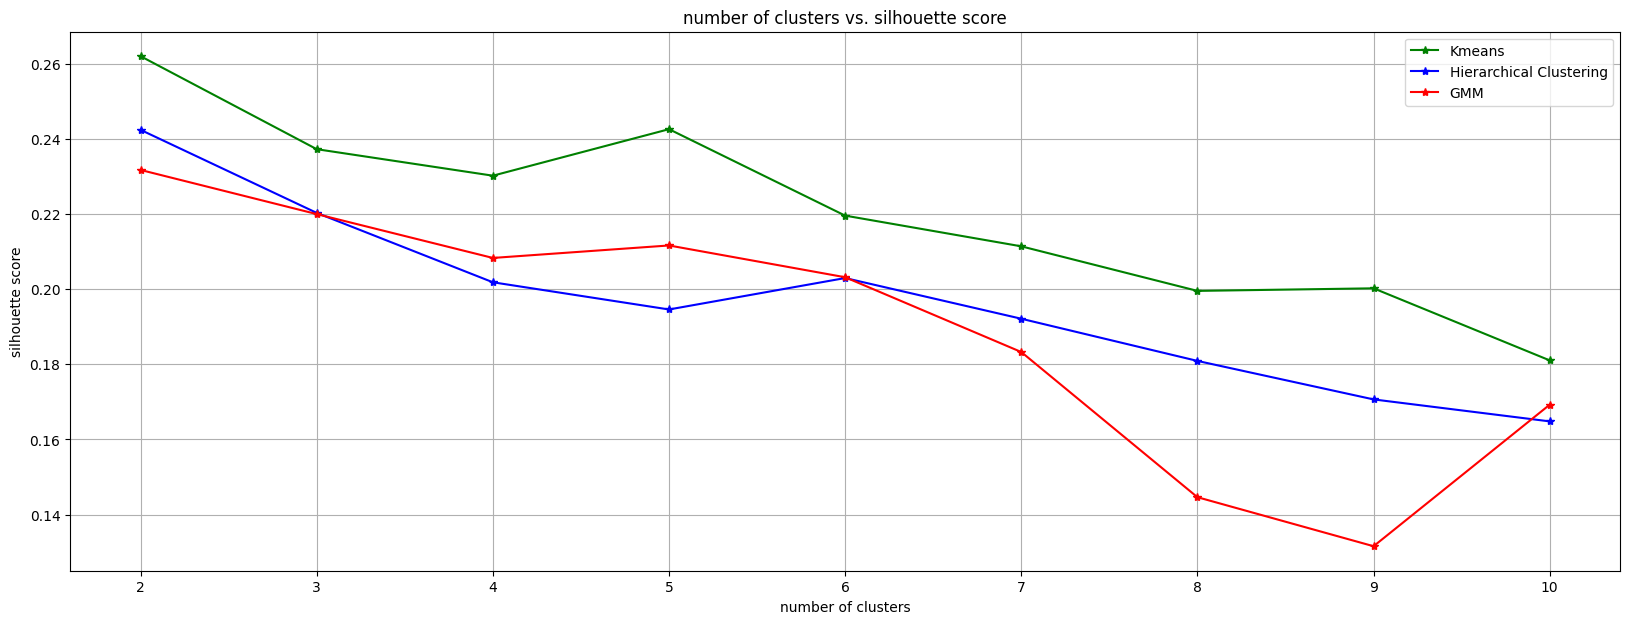

In [27]:
SC_elbow_method_beforePCA(data = new_df, k= 10)

---

# silhouette score at different number of clusters After PCA

## 1. Kmeans

### In the graph below the highest silhouette score obtained with Kmeans after PCA is at **14** principle components

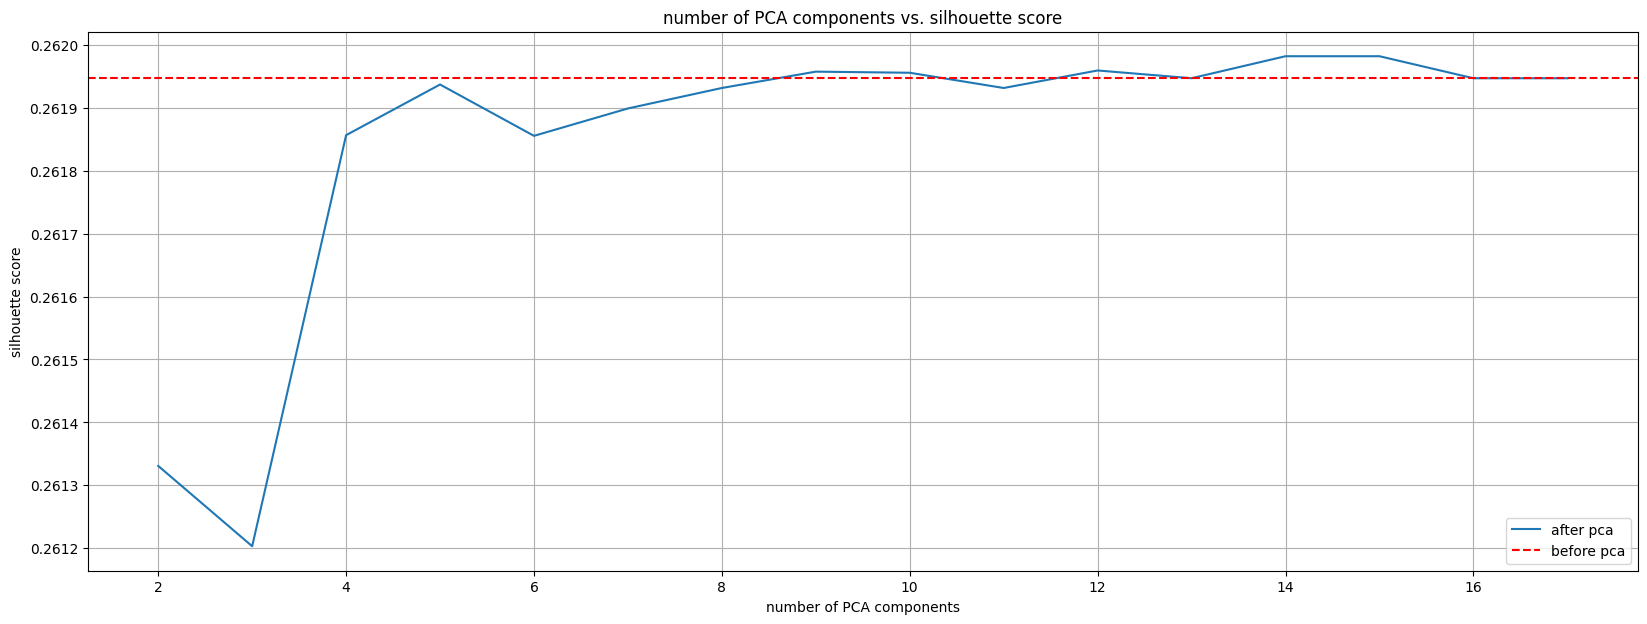

In [28]:
n_ofcomponents(new_df, pca_range=[2,17], k=2, model = "kmeans")

## 2. Hierarchical clustering

### In the graph below the highest silhouette score obtained with Hierarchical clustering after PCA is at **3** principle components


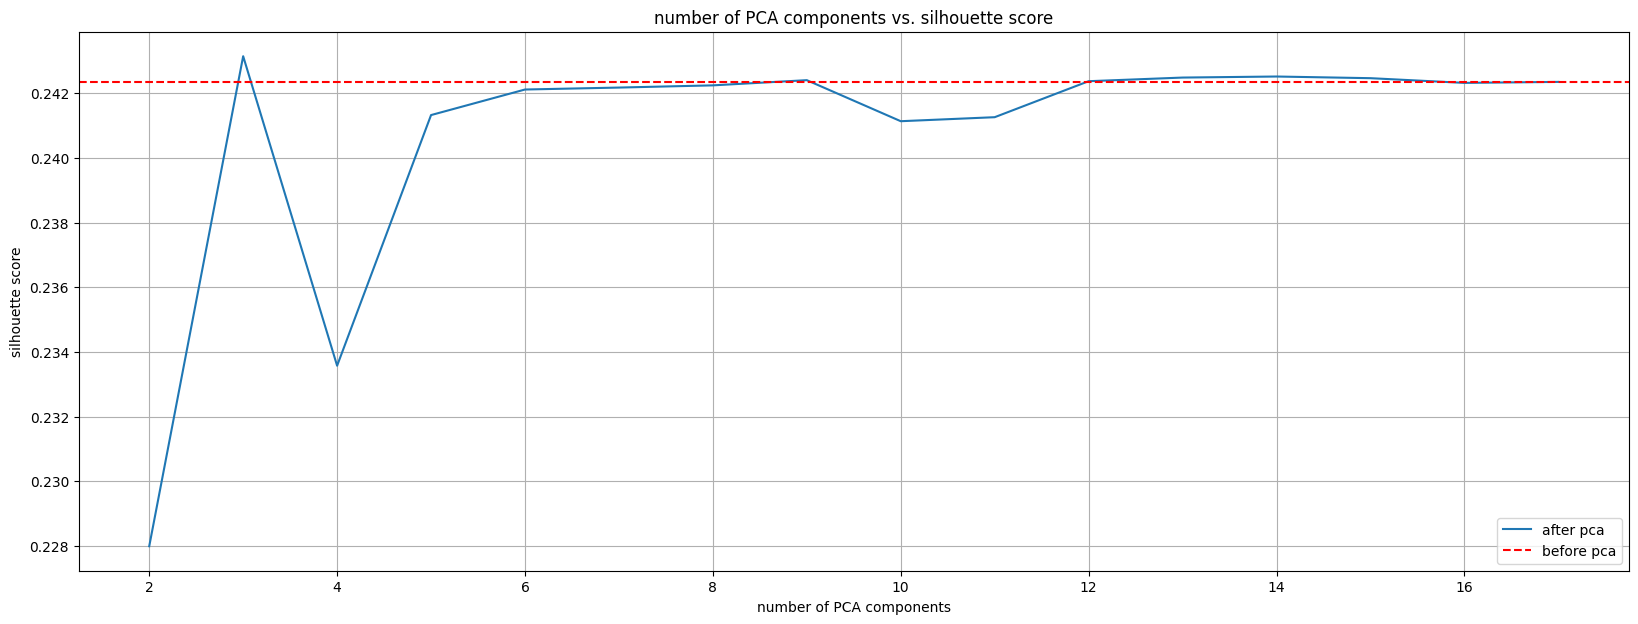

In [29]:
n_ofcomponents(new_df, pca_range=[2,17], k=2, model = "hc")

## 3. Gaussian Mixture Model

### In the graph below the highest silhouette score obtained with GMM after PCA is at **4** principle components


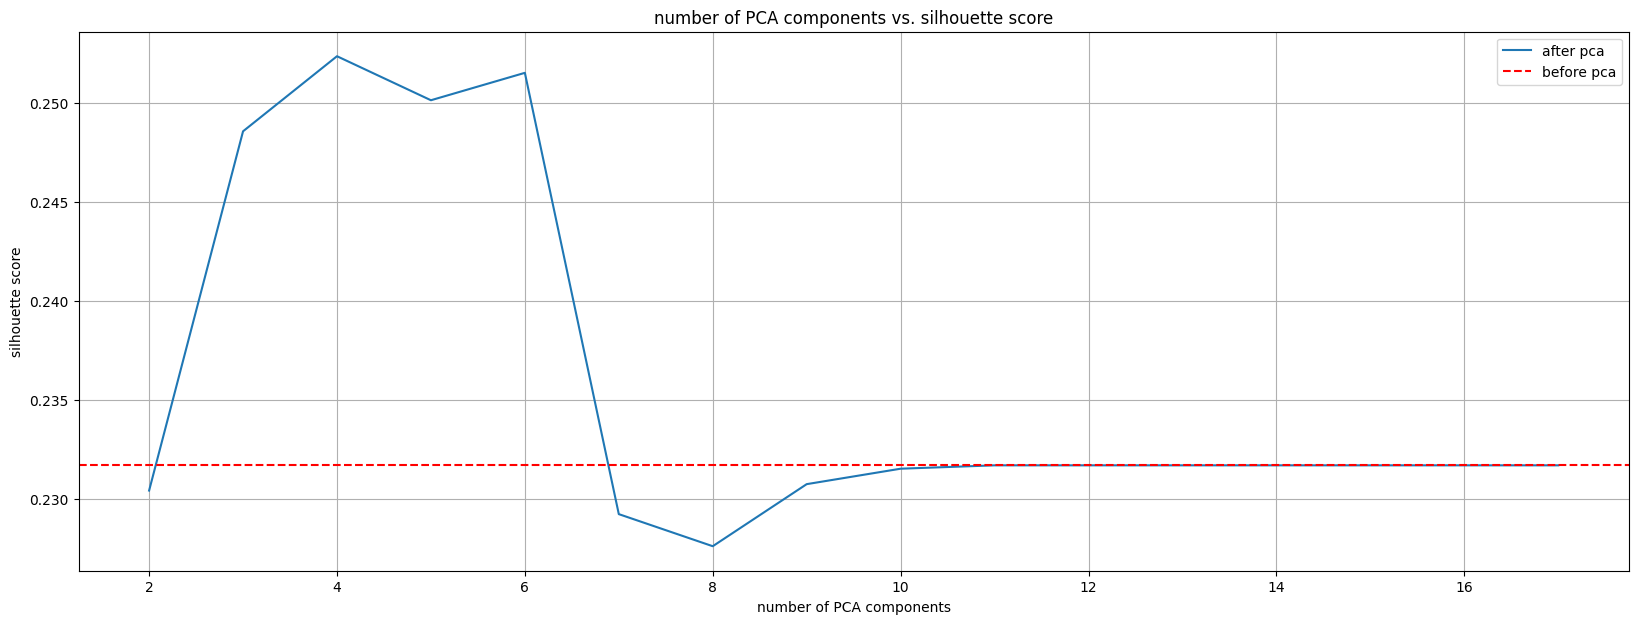

In [30]:
n_ofcomponents(new_df, pca_range=[2,17], k=2, model = "gmm")

---

# Before and after PCA with the optimum number of principle components obtained from the latest graphs

## 1. Kmeans

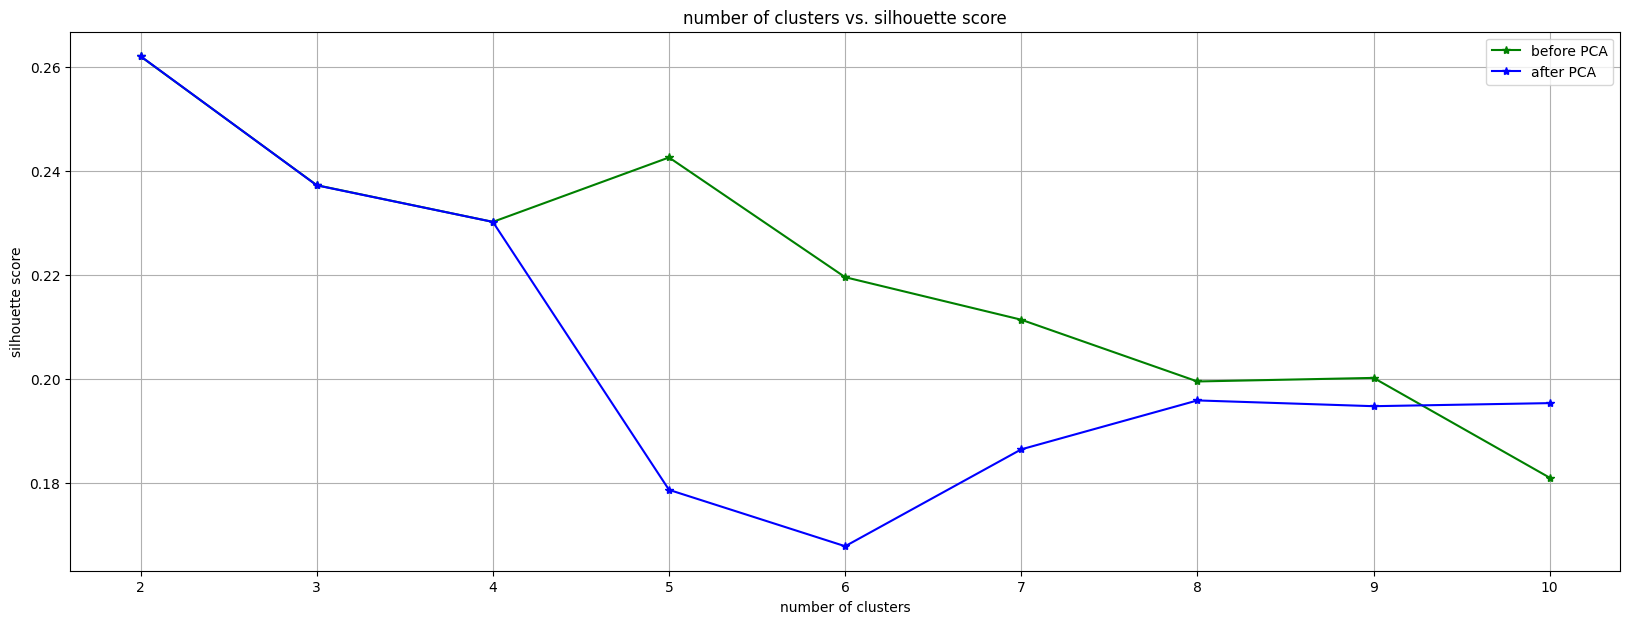

In [31]:
beforeVSafterPCA(new_df,n_pca =14 , k =10, model = "kmeans")

## 2. Hierarchical clustering

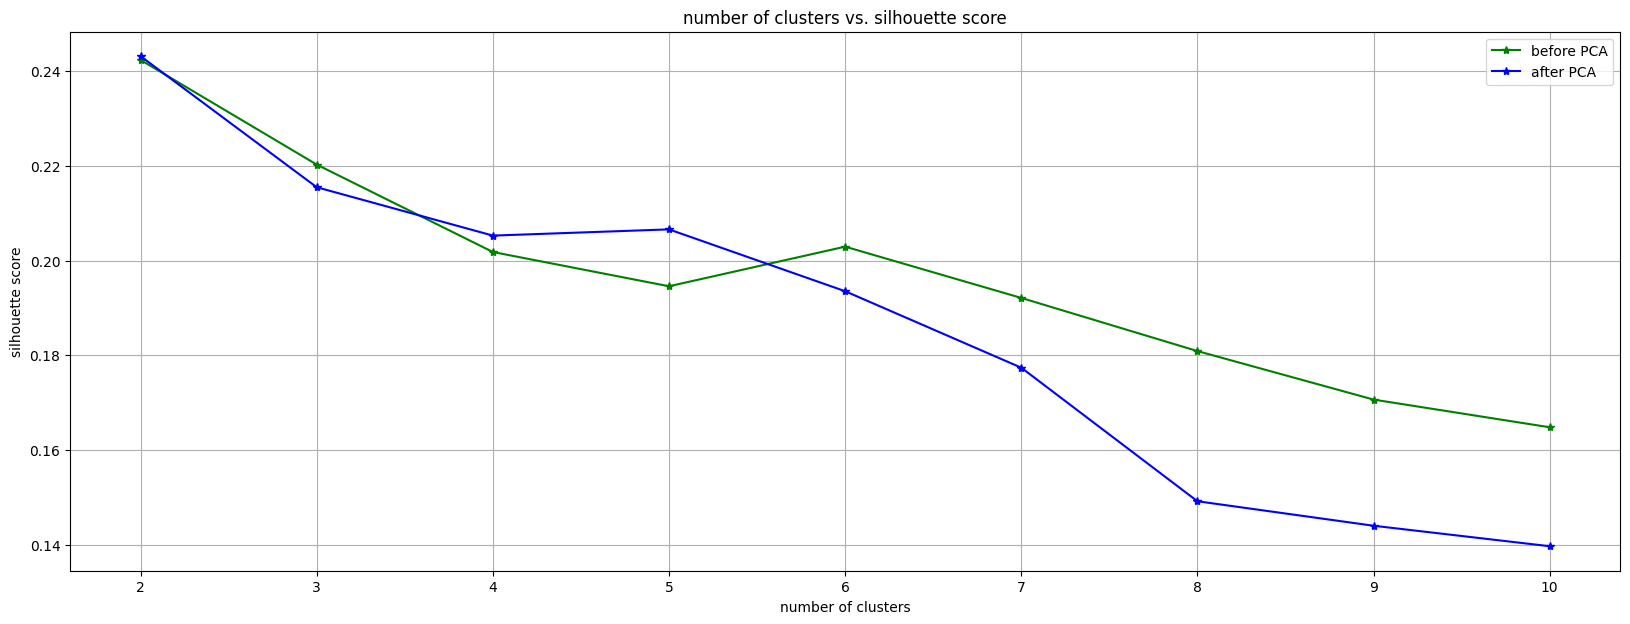

In [32]:
beforeVSafterPCA(data = new_df, n_pca =3 , k =10, model = "hc")

## 3. Gaussian Mixture Model

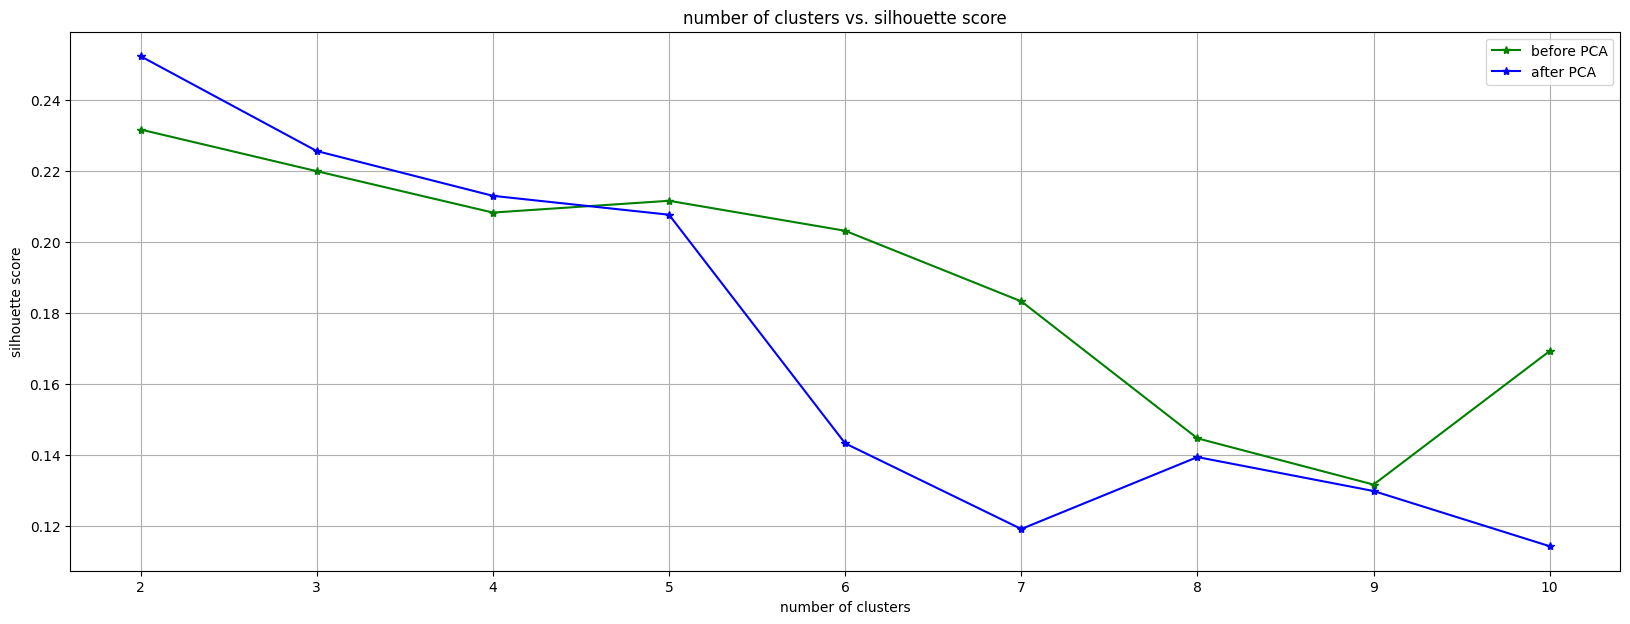

In [33]:
beforeVSafterPCA(new_df,n_pca =4 , k =10, model = "gmm")

---

# Final Evaluation

### We will visualize all the techniques before and after PCA and compare the results to find the best clustering method

### 1. Before PCA

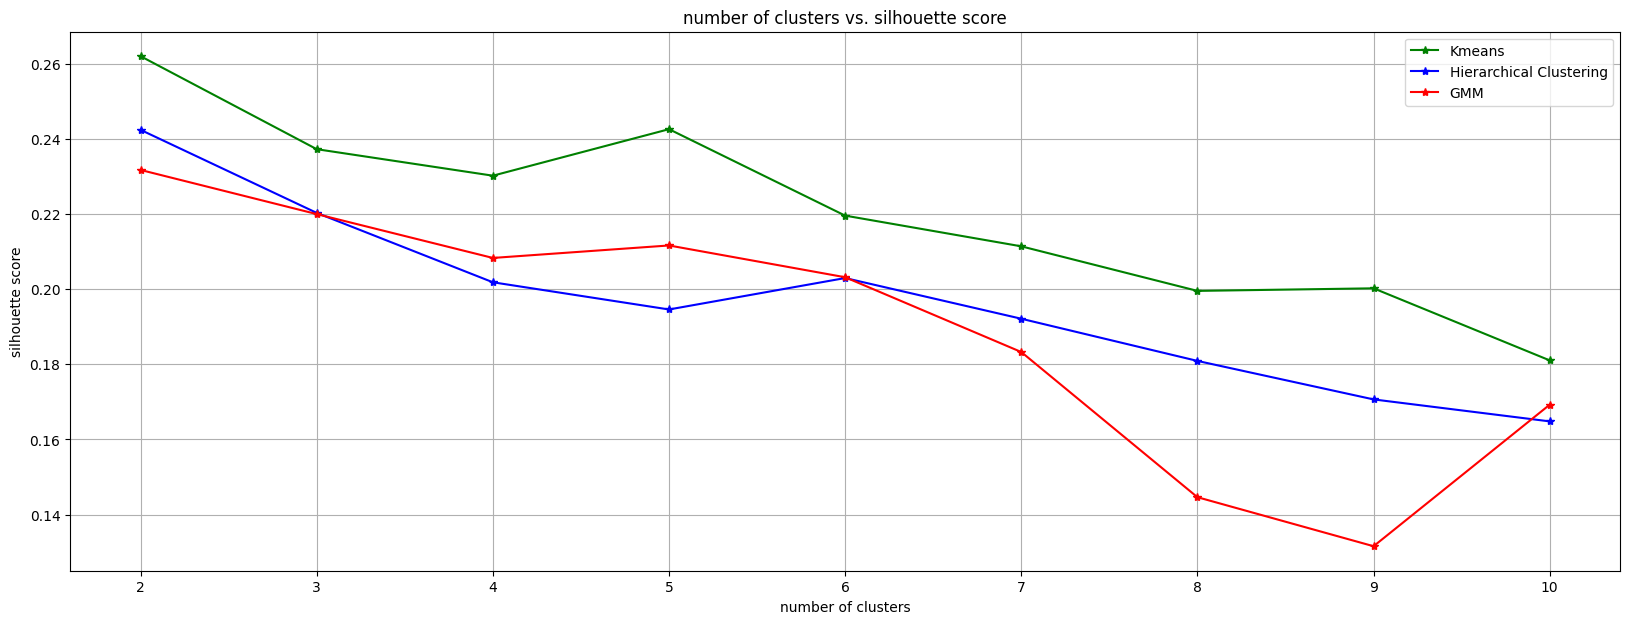

In [34]:
SC_elbow_method_beforePCA(data = new_df, k= 10)

### 2. After PCA

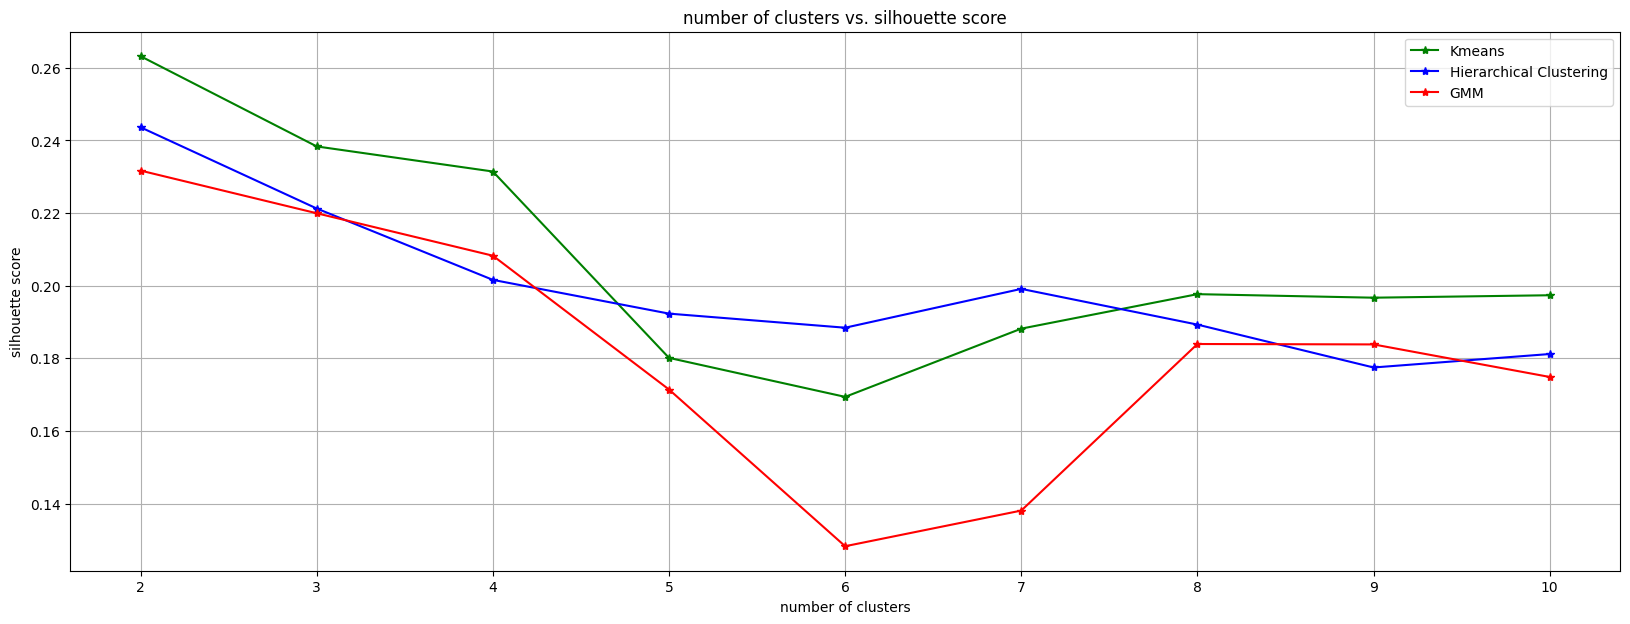

In [35]:
SC_elbow_method_afterPCA(data = new_df, k = 10, n_pca = 14)

---

# DP grid search

### We will search for clustering results using DBSCAN at differnt range of epsilons and min_samples and find the clustering results that gives 2 Clusters (3 => 0,1 for clusters and -1 for outliers)

In [36]:
for i in np.arange(.1,2,.1):
    for j in range(2,20):
        clustering = DBSCAN(eps=i, min_samples=j).fit(new_df)
        dp_labels = clustering.labels_
        x = len(set(dp_labels))
        if x == 3:
            print("-"*50)
            print(f"eps = {i}, min_samples = {j} ")
            print(f"silhouette_score of DPSCAN = {silhouette_score(new_df, dp_labels)}")
            print(f"number of clusters = {x}")
            print(Counter(dp_labels))

--------------------------------------------------
eps = 0.1, min_samples = 3 
silhouette_score of DPSCAN = -0.2666956770316488
number of clusters = 3
Counter({-1: 8944, 0: 3, 1: 3})
--------------------------------------------------
eps = 0.2, min_samples = 6 
silhouette_score of DPSCAN = -0.09745065152728082
number of clusters = 3
Counter({-1: 8925, 0: 18, 1: 7})


### The grid search didn't give any good results. In all the cases it assigned almost all the customers to one cluster (The outliers) 

---

# Conclusions

### 1. Best number of clusters = 2

### 2. Kmeans gives the highest silhouette score

### 3. Kmeans after PCA is sloghtly better then before PCA at number of principle components = 14

---

# Final Clustering model

### Kmeans at 14 Principal components

In [37]:
pca = PCA(n_components=14)
new_data0 = pca.fit_transform(new_df)
model = KMeans(n_clusters=2, random_state=42,n_init="auto").fit(new_data0)
labels = model.labels_

In [38]:
print(f"silhouette_score of Final model = {silhouette_score(new_df, labels)}")
print(Counter(labels))

silhouette_score of Final model = 0.26198178429560337
Counter({0: 5722, 1: 3228})


## Clusters distribution

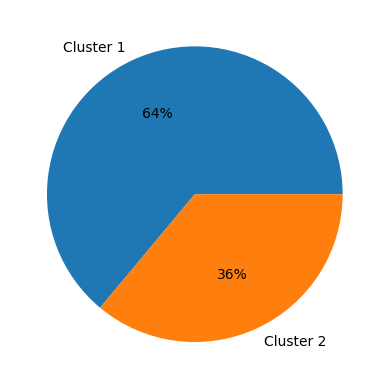

In [39]:
plt.pie(Counter(labels).values(),labels=['Cluster 1', 'Cluster 2'],autopct='%.0f%%')
plt.show()

## Visualization at 2D

<AxesSubplot: >

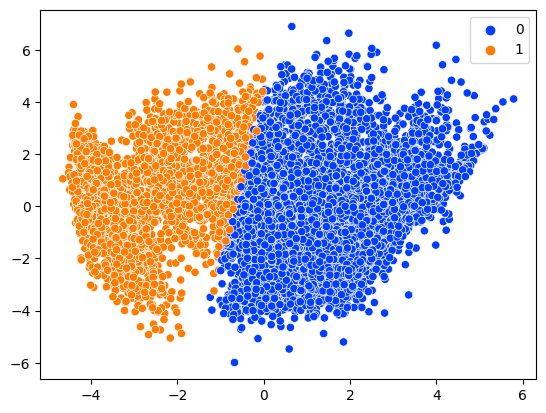

In [40]:
pca = PCA(n_components=2)

vis_data = pca.fit_transform(new_df)

sns.scatterplot(x= vis_data[:,0], y = vis_data[:,1] ,hue=labels ,palette="bright")